In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as wdgt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('SPX.csv')


This dataset was acquired from Kaggle from this link: https://www.kaggle.com/datasets/henryhan117/sp-500-historical-data/data

This is a dataset from January 1928 - November 2020, it contains details about the S&P 500's stock price every day within this period

In [2]:
df.columns = df.columns.str.strip()
df['Year'] = df['Date'].str[:4] # This was found from here: https://stackoverflow.com/questions/51607400/how-to-extract-first-8-characters-from-a-string-in-pandas
df['Month'] = df['Date'].str[5:7] 
print(df)

             Date         Open         High          Low        Close  \
0      1927-12-30    17.660000    17.660000    17.660000    17.660000   
1      1928-01-03    17.760000    17.760000    17.760000    17.760000   
2      1928-01-04    17.719999    17.719999    17.719999    17.719999   
3      1928-01-05    17.549999    17.549999    17.549999    17.549999   
4      1928-01-06    17.660000    17.660000    17.660000    17.660000   
...           ...          ...          ...          ...          ...   
23318  2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107   
23319  2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961   
23320  2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990   
23321  2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912   
23322  2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941   

         Adj Close      Volume  Year Month  
0        17.660000           0  1927    12  
1        17.760000           0  1

The first thing I want to do is cleanse the data, and by this I mean I want to make sure there's no leading spaces after the column names and then I want to extract the years and months into their own column.

In [3]:
monthly = df.groupby(['Year', 'Month'])['Open'].mean().reset_index()
monthly['Open'] = monthly['Open'].round(1) # I am rounding this to one deciaml place to make it easier to display on the charts
monthly.to_csv('monthly-data.csv', index=False)
monthly = pd.read_csv('monthly-data.csv')

yearly = df.groupby(['Year'])['Open'].mean().reset_index()
yearly['Open'] = yearly['Open'].round(1)
yearly.to_csv('yearly-data.csv', index=False)
yearly = pd.read_csv('yearly-data.csv')

Now that I have the years and months I want to extract them into 2 different csvs so that I can use them for displaying different time periods on my charts

<Axes: title={'center': 'S&P 500 Open Value By Year'}, xlabel='Year', ylabel='Open'>

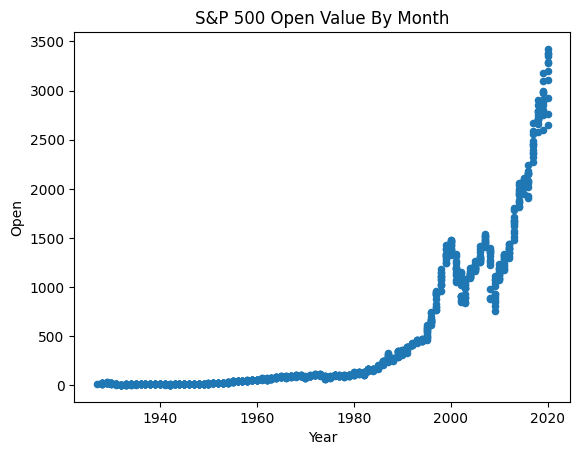

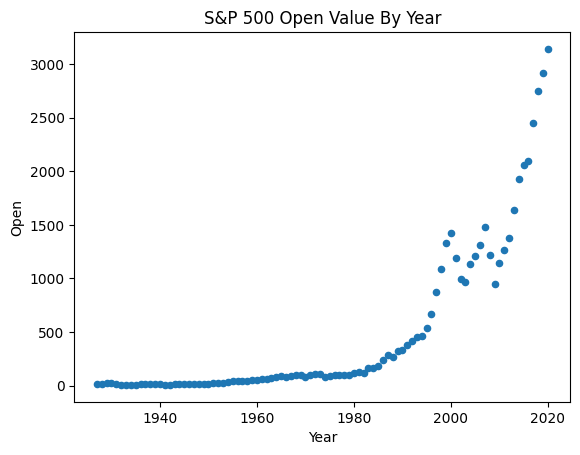

In [4]:
monthly.plot.scatter(x = 'Year', y = 'Open', title = 'S&P 500 Open Value By Month')

yearly.plot.scatter(x = 'Year', y = 'Open', title = 'S&P 500 Open Value By Year')

As we can see in the first graph the data is displaying correctly but there is probably a little too much data for it to be readable

The second one is a little more readable but I want to focus in on a period of the data more maybe from 1990 onwards so I can be able to take a bit more information from the graph that might be useful, but this is a good start.

<Axes: title={'center': 'S&P 500 Open Value By Year From 1990 Onwards'}, xlabel='Year', ylabel='Open'>

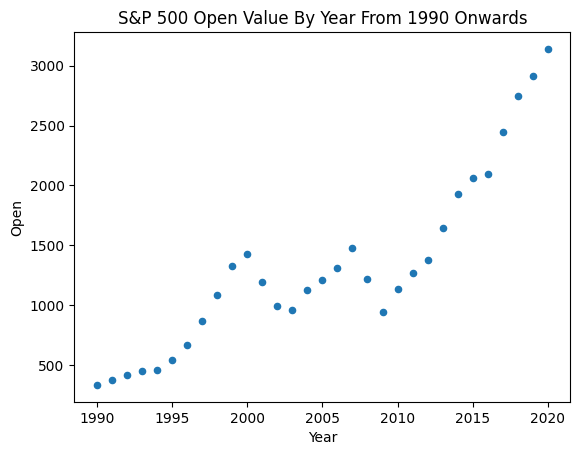

In [5]:
post_1990 = yearly[(yearly['Year'] >= 1990)]
post_1990.plot.scatter(x = 'Year', y = 'Open', title = 'S&P 500 Open Value By Year From 1990 Onwards')


This graph shows us some more interesting information now that it is focused on a more specific time frame. There are 2 major dips from the steady growth of the S&P 500, the first one being in 2008 when the global financial crisis hit, this left nearly every stock going down so this would've affected peoples investments massively

The second one was in the year 2000 and this one is a bit more interseting as this is to do with the burst of the 'dot com' bubble. In the late 90's everyone was jumping on the train of tech companies and invested very heavily in them

Most of the companies that were given heavy investment had little profit so investors started to sell their all their shares leading to the crash of the S&P 500 in the early 2000s

0.8118496655351624


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


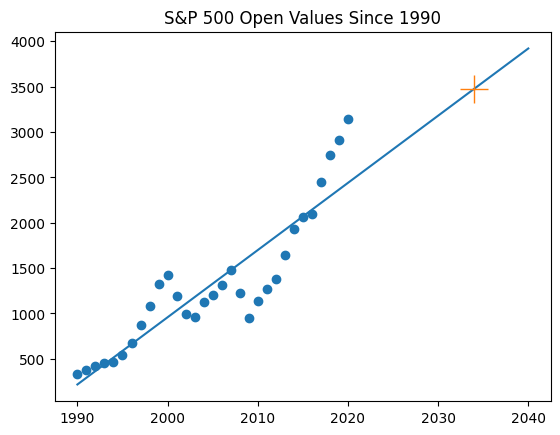

In [6]:
model = LinearRegression(fit_intercept=True)

x = post_1990[['Year']]
y = post_1990['Open'] 

model.fit(x,y)
xfit = np.linspace(1990, 2040, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.title('S&P 500 Open Values Since 1990')
plt.scatter(x, y,)
plt.plot(xfit, yfit)
# This is fitting the line to the data

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
print(r2)


prediction_input = np.array([[2034]]) # Here I am storing the year I want to predict as a NumPy array as thats the necessary format for the graph, this will return the corresponding monetary value which we can then plot on the graph
prediction_number = model.predict(prediction_input)

plt.plot(prediction_input, prediction_number, marker = '+', ls = 'none', ms= 20 ) # I found the concept for this code from here: https://www.tutorialspoint.com/how-to-plot-additional-points-on-the-top-of-a-scatter-plot-in-matplotlib

Here we can see since 1990 the models linear regression is being rated at 81% accuracy, this would be more but the two crashes in the 2000s are outliers in this data and are dragging it down a bit

The predictions that the model is making now however seem to be accurate enough as the S&P 500 does steadily increase over time especially in the last 35 years as seen on the graph

# Summary of Findings

# Data Sources 
My data for this was obtained from kaggle from this link: https://www.kaggle.com/datasets/henryhan117/sp-500-historical-data/data , I used this as I wanted to get a model so that I could test myself to get the predictions working after learning a lot about cleansing and understanding data from my first model which didn't fit the linear regression model

# Pre Processing
There was a bit of pre-processing for this data, the original data was presented in days which was a bit too specific so I turned it into months and years using the means to get the open data for it

# Data Understanding
I now have a very good understanding of this dataset, the open value is the price that is on the market at the start of the day so it is the public value in the morning , it will fluctuate throughout the day but the open is a good one to go by as it's usally evened out with its highs and lows by the end of the day. This dataset is interesting as there are 2 major dips in the S&P 500 since 1990 and they can both be atrributed to major events. the first one being in 2008 when the global financial crisis hit, this left nearly every stock going down so this would've affected peoples investments massively. The second one was in the year 2000 and this one is a bit more interseting as this is to do with the burst of the 'dot com' bubble. In the late 90's everyone was jumping on the train of tech companies and invested very heavily in them. Most of the companies that were given heavy investment had little profit so investors started to sell their all their shares leading to the crash of the S&P 500 in the early 2000s.

# Tools and tech used 
I used a few different libraries to help with displaying and understanding this dataset.
The first one I used was pandas which was absolutely crucial in helping me cleanse and process the data as I ended up making a couple of different sub CSV files from the original with more specific data.
I used matplotlib to make the charts which was helpful to display my findings and make predictions for future ones
I used scikitlearns library to implement my linear regression model on the data and get the best fit
I used numpy to calculate the data so that I could plot it all on the graph correctly
